In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
#Base URL
url ="http://publicplansdata.org/api/"

#Set parameters. Make sure to use QDataset, NOT QDataSet.  Makes a big difference
paramsratios = {
    "q": "QDataset",
    "dataset": "pensiongasbschedules",
     "format": "json",
    #"variables": 
     #"v": variables,
}
paramsbasicplandata = {
    "q": "QDataset",
    "dataset": "pensionplanbasics",
     "format": "json",
    #"variables": 
     #"v": ,
}

In [3]:
#create requests
ratiosresponse = requests.get(url, params = paramsratios)
plandataresponse = requests.get(url,params=paramsbasicplandata)

In [4]:
#create json response object
fundedratiosdata = ratiosresponse.json()
plandata = plandataresponse.json()

In [5]:
#change response object into DataFrame
funded_ratios_full = pd.DataFrame(fundedratiosdata[1:])
plan_data_full = pd.DataFrame(plandata[1:])

In [6]:
funded_ratios_full.columns

Index(['ActAssets_est', 'ActAssets_GASB', 'ActFundedRatio_est',
       'ActFundedRatio_GASB', 'ActFundedRatio_GASB67', 'ActLiabilities_est',
       'ActLiabilities_GASB', 'ActLiabilities_other', 'ADEC', 'EEGroupID',
       'fy', 'NetPensionLiability', 'NetPosition', 'notes_GASBSchedules',
       'payroll', 'PercentReqContPaid', 'ppd_id', 'RequiredContribution',
       'RequiredContribution_est', 'source_GASBSchedules', 'TierID',
       'TotalPensionLiability', 'UAAL_GASB'],
      dtype='object')

In [7]:
#remove rows with empty funded ratio data
funded_ratio_df=funded_ratios_full[['ppd_id','fy','ActFundedRatio_GASB','ActFundedRatio_est','PercentReqContPaid']].dropna()
funded_ratio_df.shape

(3758, 5)

In [8]:
plan_data_full.columns

Index(['AdministeringGovt', 'BenefitsWebsite', 'CostSharing', 'CostStructure',
       'DataEndYear', 'DataStartYear', 'EmployeeTypeCovered', 'EmployerType',
       'FiscalYearType', 'GovtName', 'InPFS', 'notes_PlanBasics', 'PlanClosed',
       'PlanFullName', 'PlanInceptionYear', 'PlanName', 'PlanType',
       'PlanYearClosed', 'ppd_directory_listed', 'ppd_id', 'SocSecCovered',
       'SocSecCovered_verbatim', 'source_PlanBasics', 'StateAbbrev',
       'StateName', 'system_id'],
      dtype='object')

In [9]:
plan_data_df=plan_data_full[['ppd_id','PlanName','StateAbbrev','PlanClosed','PlanYearClosed',]]
plan_data_df.head()

,ppd_id,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
0,1,Alabama ERS,AL,0,None
1,2,Alabama Teachers,AL,0,None
2,3,Alaska PERS,AK,1,2006
3,4,Alaska Teachers,AK,1,2006
4,5,Arizona Public Safety,AZ,0,None


In [10]:
plan_test_data_df=pd.merge(funded_ratio_df,plan_data_df,how="inner",on="ppd_id")
plan_test_data_df['ActFundedRatio_GASB'] = plan_test_data_df['ActFundedRatio_GASB'].astype(float)
plan_test_data_df.shape

(3758, 9)

In [11]:
plan_test_data_df.head(50)

,ppd_id,fy,ActFundedRatio_GASB,ActFundedRatio_est,PercentReqContPaid,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
0,1,2001,1.002,0.000,1.00000,Alabama ERS,AL,0,None
1,1,2002,0.954,0.000,1.00000,Alabama ERS,AL,0,None
2,1,2003,0.911,0.000,1.00000,Alabama ERS,AL,0,None
3,1,2004,0.897,0.000,1.00000,Alabama ERS,AL,0,None
4,1,2005,0.840,0.000,1.00000,Alabama ERS,AL,0,None
5,1,2006,0.811,0.000,1.00000,Alabama ERS,AL,0,None
6,1,2007,0.790,0.000,1.00000,Alabama ERS,AL,0,None
7,1,2008,0.757,0.000,1.00000,Alabama ERS,AL,0,None
8,1,2009,0.722,0.000,1.00000,Alabama ERS,AL,0,None
9,1,2010,0.682,0.000,1.00000,Alabama ERS,AL,0,None


In [12]:
#Find all rows that have a funded ratio greater than or equal to 90%
plan_data_20yr=plan_test_data_df[(plan_test_data_df['ActFundedRatio_GASB']>=.9)]
plan_data_20yr

,ppd_id,fy,ActFundedRatio_GASB,ActFundedRatio_est,PercentReqContPaid,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
0,1,2001,1.0020,0.000,1.00000,Alabama ERS,AL,0,None
1,1,2002,0.9540,0.000,1.00000,Alabama ERS,AL,0,None
2,1,2003,0.9110,0.000,1.00000,Alabama ERS,AL,0,None
20,2,2001,1.0140,0.000,1.00000,Alabama Teachers,AL,0,None
21,2,2002,0.9740,0.000,1.00000,Alabama Teachers,AL,0,None
...,...,...,...,...,...,...,...,...,...
3693,201,2006,1.0857,0.000,1.59940,Dallas ERS,TX,0,None
3694,201,2007,1.0920,0.000,2.49420,Dallas ERS,TX,0,None
3695,201,2008,0.9617,0.000,2.10410,Dallas ERS,TX,0,None
3696,201,2009,0.9497,0.000,0.64060,Dallas ERS,TX,0,None


In [13]:
#count number of years that each plan was above 90% funded.
plan_90plus_counts=plan_data_20yr.groupby("ppd_id")["fy"].count()
plan_90plus_counts

ppd_id
1       3
10      1
101    20
104     6
105     8
       ..
94      2
96     13
97      3
98     10
99      3
Name: fy, Length: 146, dtype: int64

In [14]:
#Top 20 plan year counts
plan_90plus_counts.sort_values(ascending=False).head(20)

ppd_id
101    20
117    20
122    19
125    19
110    19
83     19
178    19
179    19
132    18
84     18
78     18
79     17
119    17
195    17
136    17
120    16
151    16
140    16
128    16
21     15
Name: fy, dtype: int64

In [15]:
pd.set_option(
    'display.max_rows', 100
)

In [16]:
#Pull list of of plan IDs that have 19+ years of 90%+ funding ratios
plan_focus=plan_90plus_counts[plan_90plus_counts>=19]
plan_focus_list=plan_focus.index.values
plan_focus_list

array(['101', '110', '117', '122', '125', '178', '179', '83'],
      dtype=object)

In [17]:
#Manual Plan data check to confirm that each plan covers 2001-2019
plan_data_20yr_check=plan_data_20yr[(plan_data_20yr["ppd_id"]=="132")]
plan_data_20yr_check

,ppd_id,fy,ActFundedRatio_GASB,ActFundedRatio_est,PercentReqContPaid,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
2522,132,2001,0.92290,0.000,1.33725,Louisiana Parochial Employees,LA,0,None
2523,132,2002,0.92500,0.000,1.07290,Louisiana Parochial Employees,LA,0,None
2524,132,2003,0.92800,0.000,0.71190,Louisiana Parochial Employees,LA,0,None
2525,132,2004,0.93500,0.000,0.90040,Louisiana Parochial Employees,LA,0,None
2526,132,2005,0.94300,0.000,1.07110,Louisiana Parochial Employees,LA,0,None
2527,132,2006,0.95000,0.000,0.90450,Louisiana Parochial Employees,LA,0,None
2528,132,2007,0.96900,0.000,1.42150,Louisiana Parochial Employees,LA,0,None
2529,132,2008,0.96000,0.000,1.48500,Louisiana Parochial Employees,LA,0,None
2530,132,2009,0.96900,0.000,0.78390,Louisiana Parochial Employees,LA,0,None
2531,132,2010,0.97200,0.000,1.17100,Louisiana Parochial Employees,LA,0,None


In [18]:
focus_plans_list=["101","110","125","179"]

In [19]:
focus_plans_true=plan_test_data_df.ppd_id.isin(focus_plans_list)

In [20]:
focus_plans_data_df=plan_test_data_df[focus_plans_true]

In [21]:
focus_plans_data_df

,ppd_id,fy,ActFundedRatio_GASB,ActFundedRatio_est,PercentReqContPaid,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
1970,101,2001,0.96400,0.000,1.00000,South Dakota RS,SD,0,None
1971,101,2002,0.96700,0.000,1.00000,South Dakota RS,SD,0,None
1972,101,2003,0.97200,0.000,1.00000,South Dakota RS,SD,0,None
1973,101,2004,0.97700,0.000,1.00000,South Dakota RS,SD,0,None
1974,101,2005,0.96600,0.000,1.00000,South Dakota RS,SD,0,None
1975,101,2006,0.96700,0.000,1.00000,South Dakota RS,SD,0,None
1976,101,2007,0.97100,0.000,1.00000,South Dakota RS,SD,0,None
1977,101,2008,0.97200,0.000,1.00000,South Dakota RS,SD,0,None
1978,101,2009,0.91800,0.000,0.91000,South Dakota RS,SD,0,None
1979,101,2010,0.96300,0.000,1.00000,South Dakota RS,SD,0,None


In [22]:
focus_plans_data_df=focus_plans_data_df[(focus_plans_data_df["fy"]!="2020")]

In [23]:
focus_plans_data_df

,ppd_id,fy,ActFundedRatio_GASB,ActFundedRatio_est,PercentReqContPaid,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
1970,101,2001,0.96400,0.000,1.00000,South Dakota RS,SD,0,None
1971,101,2002,0.96700,0.000,1.00000,South Dakota RS,SD,0,None
1972,101,2003,0.97200,0.000,1.00000,South Dakota RS,SD,0,None
1973,101,2004,0.97700,0.000,1.00000,South Dakota RS,SD,0,None
1974,101,2005,0.96600,0.000,1.00000,South Dakota RS,SD,0,None
1975,101,2006,0.96700,0.000,1.00000,South Dakota RS,SD,0,None
1976,101,2007,0.97100,0.000,1.00000,South Dakota RS,SD,0,None
1977,101,2008,0.97200,0.000,1.00000,South Dakota RS,SD,0,None
1978,101,2009,0.91800,0.000,0.91000,South Dakota RS,SD,0,None
1979,101,2010,0.96300,0.000,1.00000,South Dakota RS,SD,0,None


In [24]:
#Manual Plan data check to confirm that each plan covers 2001-2019
plan_data_20yr_check=plan_test_data_df[(plan_test_data_df["ppd_id"]=="83")]
plan_data_20yr_check

,ppd_id,fy,ActFundedRatio_GASB,ActFundedRatio_est,PercentReqContPaid,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
1606,83,2001,1.20100,0.000,1.00000,NY State & Local ERS,NY,0,None
1607,83,2002,1.18900,0.000,1.00000,NY State & Local ERS,NY,0,None
1608,83,2003,0.98700,0.000,1.00000,NY State & Local ERS,NY,0,None
1609,83,2004,1.00500,0.000,1.00000,NY State & Local ERS,NY,0,None
1610,83,2005,1.02802,0.000,1.00000,NY State & Local ERS,NY,0,None
1611,83,2006,1.04105,0.000,1.00000,NY State & Local ERS,NY,0,None
1612,83,2007,1.05755,0.000,1.00000,NY State & Local ERS,NY,0,None
1613,83,2008,1.07267,0.000,1.00000,NY State & Local ERS,NY,0,None
1614,83,2009,1.01040,0.000,1.00000,NY State & Local ERS,NY,0,None
1615,83,2010,0.93942,0.000,1.00000,NY State & Local ERS,NY,0,None


<AxesSubplot:title={'center':'Average Funding Ratio'}, xlabel='PlanName'>

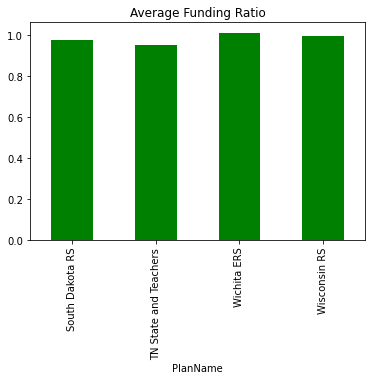

In [25]:
focus_plans_data_df.groupby("PlanName")["ActFundedRatio_GASB"].mean().plot(kind='bar', 
                                                                   x='PlanName', 
                                                                   y='Avg Funding Ratio',
                                                                   color='green',
                                                                   title='Average Funding Ratio')

<function matplotlib.pyplot.show(close=None, block=None)>

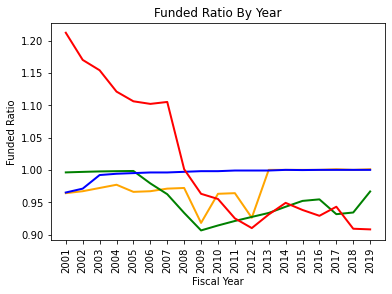

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


plan_101=focus_plans_data_df[focus_plans_data_df["ppd_id"]=="101"]
plan_101_fundrat=plan_101["ActFundedRatio_GASB"]
plan_101_fy=plan_101["fy"]

plan_110=focus_plans_data_df[focus_plans_data_df["ppd_id"]=="110"]
plan_110_fundrat=plan_110["ActFundedRatio_GASB"]
plan_110_fy=plan_110["fy"]

plan_125=focus_plans_data_df[focus_plans_data_df["ppd_id"]=="125"]
plan_125_fundrat=plan_125["ActFundedRatio_GASB"]
plan_125_fy=plan_125["fy"]

plan_179=focus_plans_data_df[focus_plans_data_df["ppd_id"]=="179"]
plan_179_fundrat=plan_179["ActFundedRatio_GASB"]
plan_179_fy=plan_179["fy"]

plt.title('Funded Ratio By Year')
plt.ylabel('Funded Ratio')
plt.xlabel('Fiscal Year')
plt.plot(plan_101_fy,plan_101_fundrat,linewidth="2",c = 'orange',label="South Dakota RS")
plt.plot(plan_110_fy,plan_110_fundrat,linewidth="2",c = 'green',label="TN State and Teachers")
plt.plot(plan_125_fy,plan_125_fundrat,linewidth="2",c = 'blue',label="Wisconsin RS")
plt.plot(plan_179_fy,plan_179_fundrat,linewidth="2",c = 'red',label="Wichita ERS")
plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.show